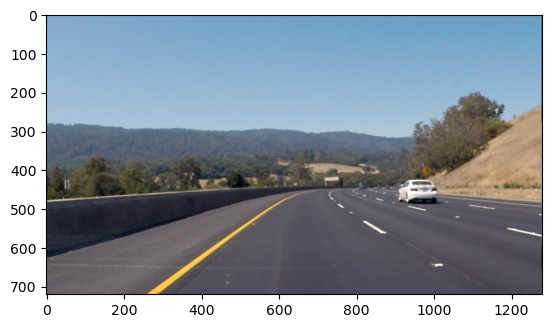

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

image = mpimg.imread('./../images/curved_lane.jpg')
plt.imshow(image)

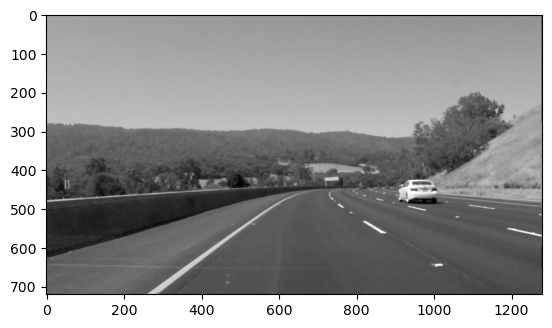

In [2]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")

In [11]:
sobel = np.array([
    [-1, -2, -1],
    [0,0,0],
    [1,2,1]
])
sobel_y = sobel.copy()
sobel_x = sobel.T

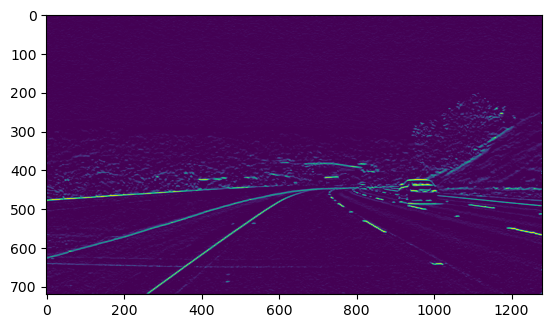

In [12]:
filtered_image = cv2.filter2D(gray, -1, sobel_y)
plt.imshow(filtered_image)

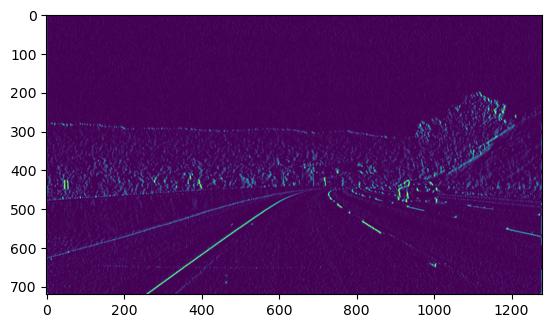

In [10]:
filtered_image = cv2.filter2D(gray, -1, sobel_x)
plt.imshow(filtered_image)

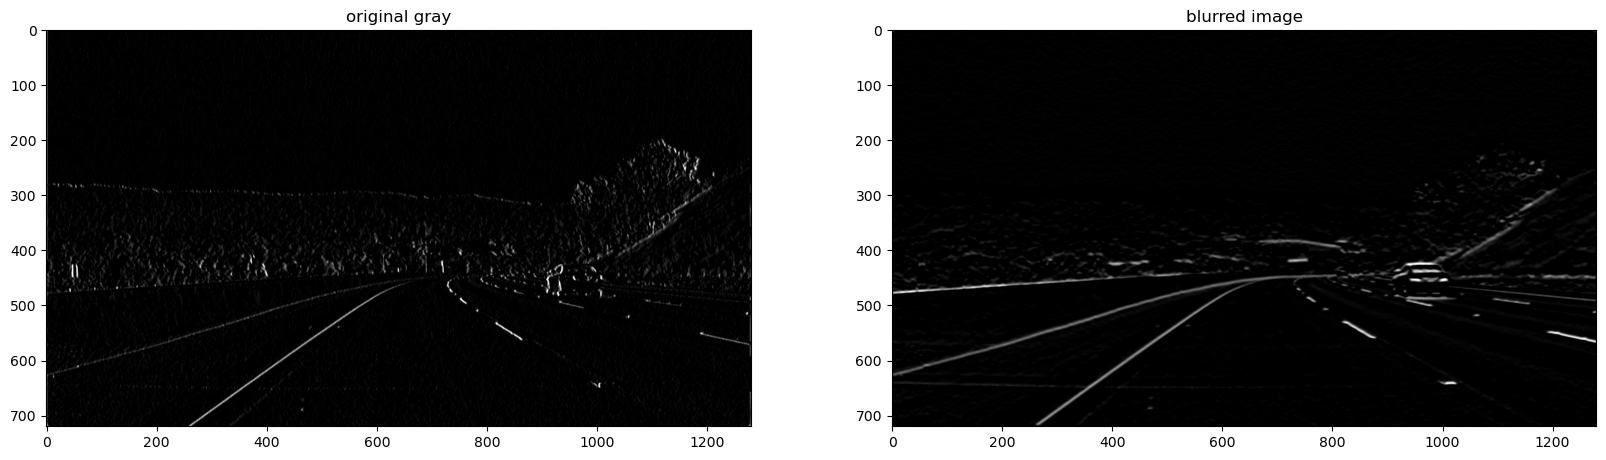

In [14]:

# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1],
                   [ -2, 0, 2],
                   [ -1, 0, 1]])


sobel_y = np.array([[ -1, -2, -1],
                   [ 0, 0, 0],
                   [ 1, 2, 1]])


# Filter the orginal and blurred grayscale images using filter2D
filtered = cv2.filter2D(gray, -1, sobel_x)
gray_blur = cv2.GaussianBlur(gray, (9, 9), 0)
filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_y)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(filtered_blurred, cmap='gray')

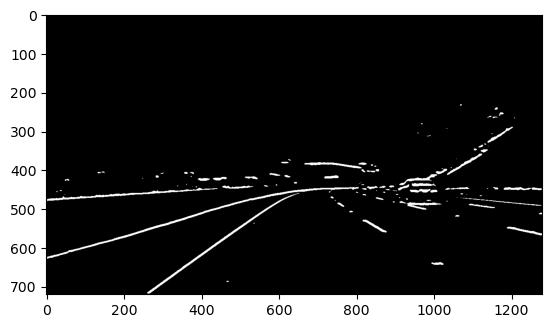

In [15]:
# Create threshold that sets all the filtered pixels to white
# Above a certain threshold

retval, binary_image = cv2.threshold(filtered_blurred, 50, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')